# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.099960e+01     7.715875e+00
 * time: 0.0019960403442382812
     1     2.978224e+01     5.415025e+00
 * time: 0.008661031723022461
     2     2.061579e+01     6.705811e+00
 * time: 0.017574071884155273
     3     1.624374e+01     7.050545e+00
 * time: 0.022616863250732422
     4     1.164516e+01     3.261659e+00
 * time: 0.027673006057739258
     5     9.519712e+00     1.267941e+00
 * time: 0.03219294548034668
     6     8.973810e+00     1.216877e+00
 * time: 0.03600001335144043
     7     8.676604e+00     6.811469e-01
 * time: 0.03989005088806152
     8     8.454794e+00     8.288639e-01
 * time: 0.04404592514038086
     9     8.300661e+00     5.124605e-01
 * time: 0.04813790321350098
    10     8.212614e+00     5.495460e-01
 * time: 0.05292987823486328
    11     8.140141e+00     4.173209e-01
 * time: 0.05837202072143555
    12     8.089400e+00     6.806380e-01
 * time: 0.06177496910095215
    13     8.047205e+00     5.336808e-01
 *

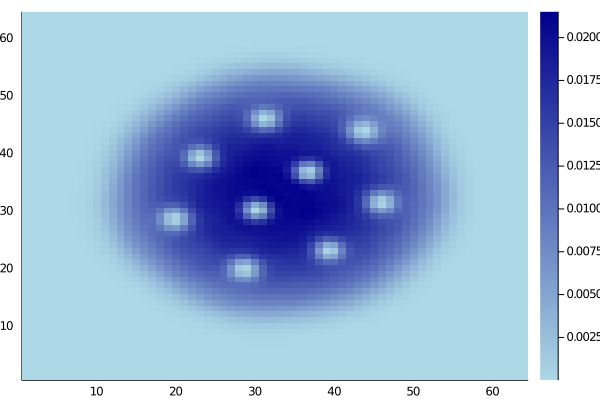

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)